In [6]:
import numpy as np
import matplotlib.pyplot as plt

%config Inline.figure_format = "retina"


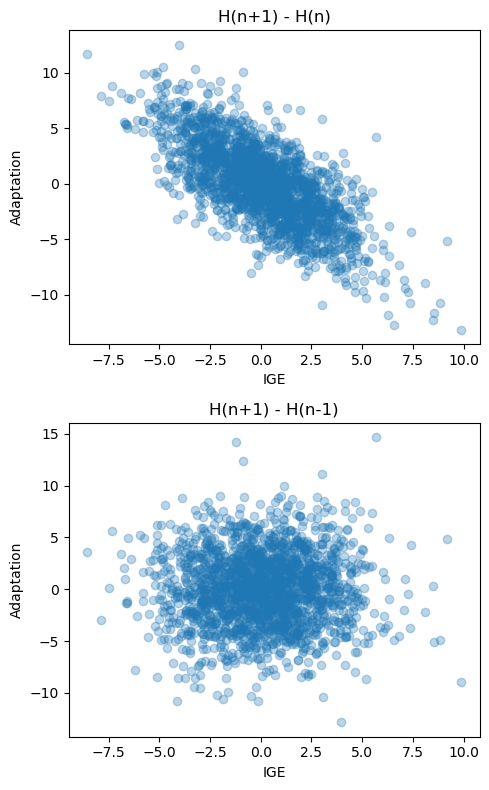

In [30]:
# Simulate noisy reaches
hand = np.random.normal(loc=0, scale=2.5, size=2000)

# Analyze correlation between h(n+1) - h(n)
adapt_wrong = hand[1:] - hand[0:-1]
ige_wrong = hand[0:-1]

# Analyze correlation between h(n+1) - h(n-1)
adapt_correct = hand[2:] - hand[0:-2]
ige_correct = hand[1:-1]

# Plot
fig, ax = plt.subplots(2, 1, figsize=(5, 8))
ax[0].scatter(ige_wrong, adapt_wrong, alpha=0.3)
ax[0].set(xlabel="IGE", ylabel="Adaptation", title="H(n+1) - H(n)")
ax[1].scatter(ige_correct, adapt_correct, alpha=0.3)
ax[1].set(xlabel="IGE", ylabel="Adaptation", title="H(n+1) - H(n-1)")
plt.tight_layout()

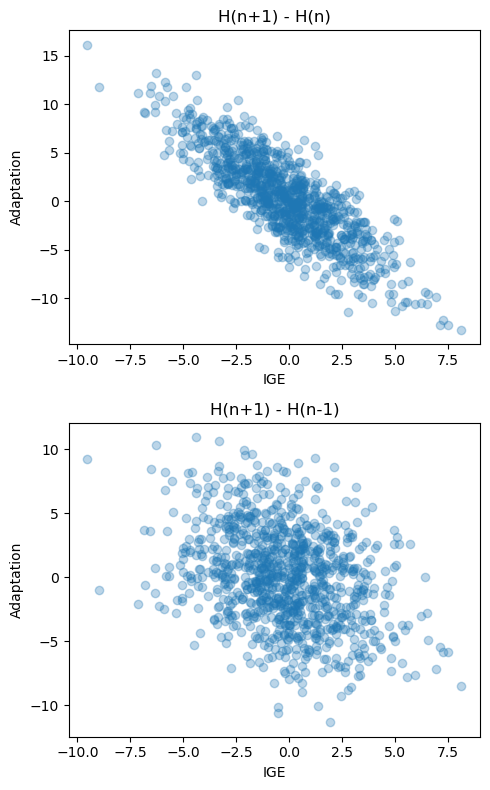

In [64]:
# Simulate adaptation to ige
N_trials = 2000
pert_idx = np.arange(1, N_trials, 2)
ige = np.random.normal(0, 2.5, N_trials)
hand_angle = np.zeros(N_trials)
adapt_wrong = np.zeros(N_trials)
adapt_correct = np.zeros(N_trials)
B = -0.5

for n in range(N_trials - 1):
    # No-feedback trials
    if n % 2 == 0:
        hand_angle[n + 1] = ige[n + 1]
    # Visual feedback trials
    if n % 2 == 1:
        hand_angle[n + 1] = B * hand_angle[n] + ige[n + 1]
        adapt_wrong[n] = hand_angle[n + 1] - hand_angle[n]
        adapt_correct[n] = hand_angle[n + 1] - hand_angle[n - 1]

# Plot
fig, ax = plt.subplots(2, 1, figsize=(5, 8))
ax[0].scatter(hand_angle[pert_idx], adapt_wrong[pert_idx], alpha=0.3)
ax[0].set(xlabel="IGE", ylabel="Adaptation", title="H(n+1) - H(n)")
ax[1].scatter(hand_angle[pert_idx], adapt_correct[pert_idx], alpha=0.3)
ax[1].set(xlabel="IGE", ylabel="Adaptation", title="H(n+1) - H(n-1)")
plt.tight_layout()

In [46]:
hand_angle.std()

2.634729402706697

In [60]:
4%2

0